<a href="https://colab.research.google.com/github/SammEccent/Filtering-Image-processing/blob/main/Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [154]:
import cv2
import numpy as np
from skimage import img_as_ubyte
import matplotlib.pyplot as plt

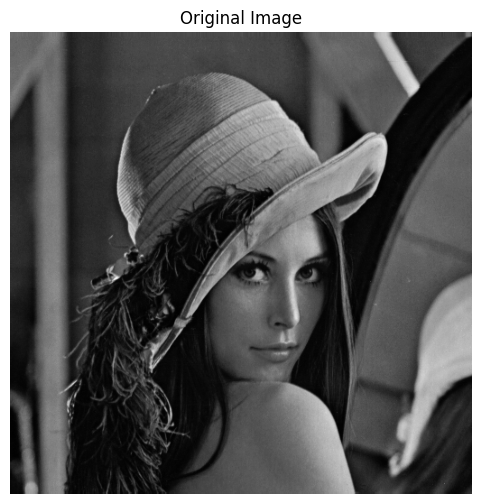

In [155]:
## original image
img = cv2.imread('lenna.png', 0)
img = img / img.max()  # normalize the pixel value (0~1)

# Original Image
plt.figure(figsize=(6, 6))
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

In [140]:
# Gaussian Noise
x, y = img.shape
mean = 0
var = 0.01
sigma = np.sqrt(var)
n = np.random.normal(loc=mean,
                     scale=sigma,
                     size=(x,y))
img_noise = img + n

# Preview
plt.figure(figsize=(6, 6))
plt.imshow(img_noise, cmap='gray')
plt.title("Image + Gaussian Noise")
plt.axis('off')
plt.show()

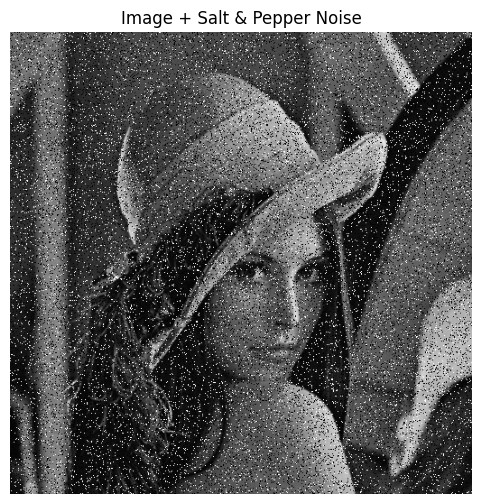

In [162]:
# Salt and Pepper Noise
x, y = img.shape
g = np.zeros((x, y), dtype=np.float32)
pepper = 0.1
salt = 0.95
for i in range(x):
    for j in range(y):
        rdn = np.random.random()
        if rdn < pepper:
            g[i][j] = 0
        elif rdn > salt:
            g[i][j] = 1
        else:
            g[i][j] = img[i][j]

img_noise = g

# Preview
plt.figure(figsize=(6, 6))
plt.imshow(img_noise, cmap='gray')
plt.title("Image + Salt & Pepper Noise")
plt.axis('off')
plt.show()

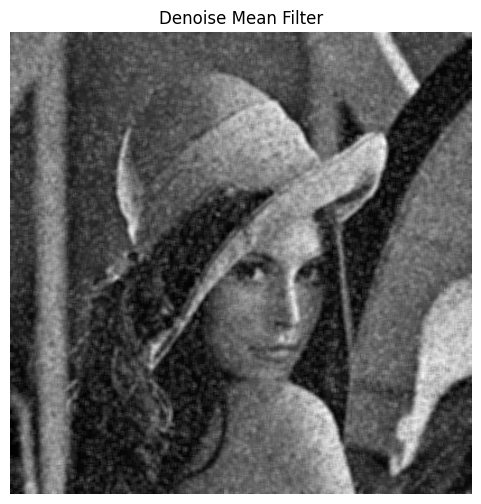

In [163]:
# mean filter (average)
m = 5
n = 5
denoise_mean = cv2.blur(img_noise, (m,n))

# Preview
plt.figure(figsize=(6, 6))
plt.imshow(denoise_mean, cmap='gray')
plt.title("Denoise Mean Filter")
plt.axis('off')
plt.show()

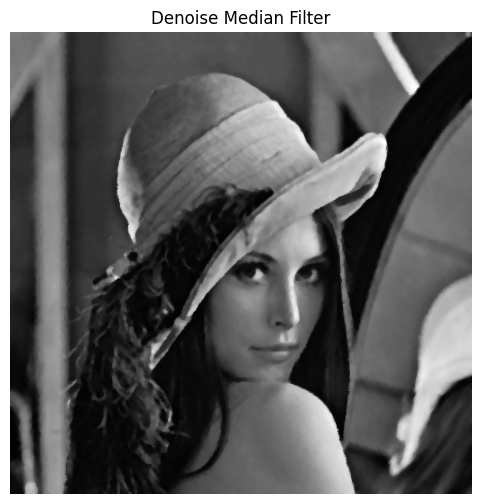

In [169]:
# median filter
img_noise_median = np.clip(img_noise, -1, 1)
img_noise_median = img_as_ubyte(img_noise_median)
denoise_median = cv2.medianBlur(img_noise_median, 5)

# Preview
plt.figure(figsize=(6, 6))
plt.imshow(denoise_median, cmap='gray')
plt.title("Denoise Median Filter")
plt.axis('off')
plt.show()

In [ ]:
## (optional) save the result
cv2.imwrite('Denoise mean.jpg', img_as_ubyte(denoise_mean))
cv2.imwrite('Denoise median.jpg', img_as_ubyte(denoise_median))